# Fit a transiting planet signal with a trapezoid model

**[This notebook is for visualization purposes only. It shows you how the resulting figures *should* look like, but there's no code to generate them. Hence: don't run the notebook!]**

Monitoring the flux of a star might reveal the presence of a exoplanets when the planet "transits" across the front of the start as seen from our perspective. It causes a reduction of the apparent brightness of the star, and conducting large monitoring programs for the [transit method](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets#Transit_photometry) has become one of the most successful methods to detect exoplanets.

We will use a simple model to describe the transit signal: a symmetric trapezoid. While it is geometrically simple, it is a non-linear model, that means you canot write down a design matrix for it So we need a more general minimizer to fit any given data. By the end of this notebook you will have all you need to fit transit data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import transit as tr 

In [2]:
t,f = tr.read_data(7016.01)

In [3]:
# Inspect the first 10 elements of both t and f
print(t[:10])
print(f[:10])

[-0.85678038 -0.85398809 -0.8511742  -0.84827032 -0.8363477  -0.83074144
 -0.81591503 -0.81312269 -0.81030867 -0.80740448]
[-129.56602943   57.06468764  184.46989873  273.60262566   37.29958245
  -22.24329835  -11.90913873  -96.34080819  108.82380341   73.73481319]


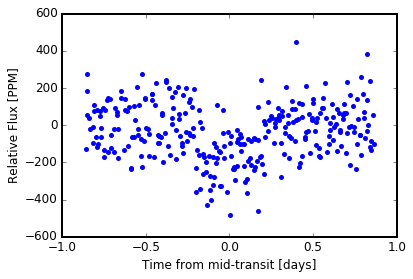

In [4]:
tr.plot_data(7016.01);

(-250, 50)

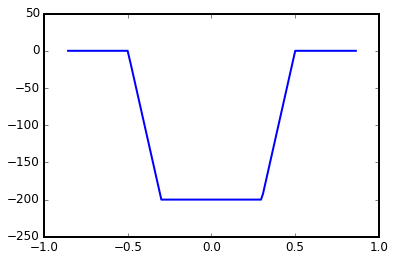

In [5]:
pars = [0, 1.0, 0.2, 200] # t0 [center], T [duration], tau [ingress duration], depth
t,f = tr.read_data(7016.01)
plt.plot(t, tr.trapezoid(pars,t))
plt.ylim(-250,50)

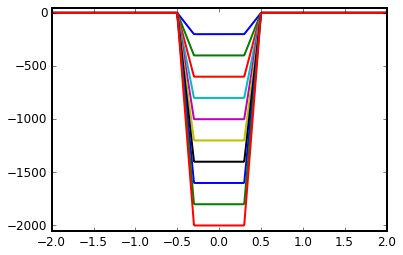

In [6]:
# Vary depth
depths = np.linspace(200,2000,10)
tr.vary_depth(depths); #plots a trapezoid for each depth, with default other parameters

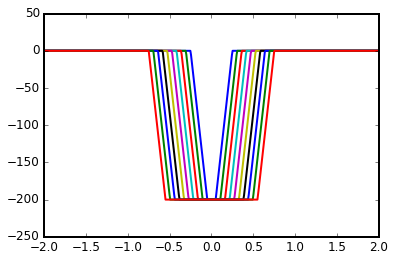

In [7]:
# Vary duration
durations = np.linspace(0.5,1.5,10)
tr.vary_duration(durations);

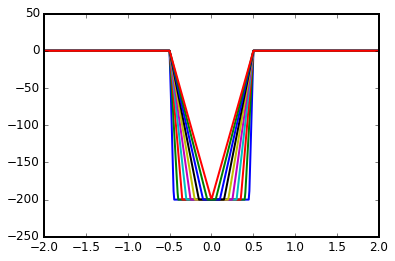

In [8]:
# Vary tau
taus = np.linspace(0.05,0.5,10)
tr.vary_tau(taus);

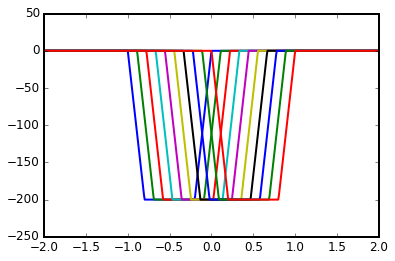

In [9]:
# Vary t0
t0s = np.linspace(-0.5,0.5,10)
tr.vary_t0(t0s);

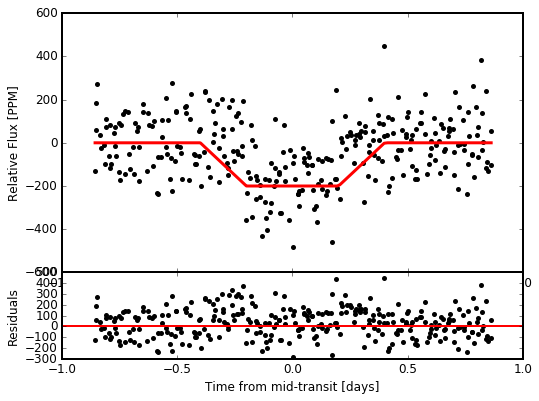

In [10]:
param_guess = [0, 0.8, 0.2, 200]
tr.plot_fit(7016.01, param_guess);  

In [13]:
fit = tr.fit_trapezoid(7016.01, method='Nelder-Mead') #this uses scipy.optimize.minimize
fit

  status: 0
    nfev: 598
 success: True
     fun: 4945388.578226734
       x: array([  5.68499626e-04,   4.56753417e-01,   7.13483056e-02,
         1.81738803e+02])
 message: 'Optimization terminated successfully.'
     nit: 347

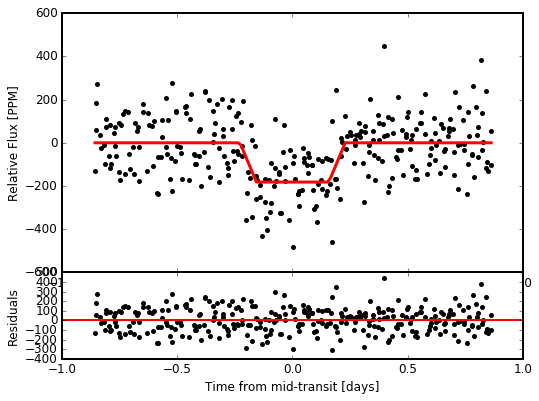

In [12]:
tr.plot_fit(7016.01, fit.x);